In [ ]:
# https://colab.research.google.com/github/HandsOnLLM/Hands-On-Large-Language-Models/blob/main/chapter08/Chapter%208%20-%20Semantic%20Search.ipynb#scrollTo=uOFFg7YWFoaf

In [ ]:
!pip install langchain==0.2.5 faiss-gpu==1.7.2 cohere==5.5.8 langchain-community==0.2.5 rank_bm25==0.2.2 sentence-transformers==3.0.1
!CMAKE_ARGS="-DLLAMA_CUDA=on" pip install llama-cpp-python==0.2.78

ERROR: Could not find a version that satisfies the requirement faiss-gpu==1.7.2 (from versions: none)
ERROR: No matching distribution found for faiss-gpu==1.7.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 MB 9.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.5 MB/s eta 0:00:00
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py

In [ ]:
!pip install cohere

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.9/252.9 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 107.1 MB/s eta 0:00:00


In [ ]:
api_key = "Yy2TE1sKjwuS5ByVIODhnnFJJ0Mg5JXoDOs9EJ1x"

In [ ]:
import cohere

In [ ]:
co = cohere.Client(api_key)

In [ ]:
text = """
Interstellar is a 2014 epic science fiction drama film directed by Christopher Nolan, who co-wrote the screenplay with his brother Jonathan. It stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, and Michael Caine. Set in a dystopian future where Earth is suffering from catastrophic blight and famine, the film follows a group of astronauts who travel through a wormhole near Saturn in search of a new home for mankind.
The screenplay had its origins in a script Jonathan developed in 2007 and was originally set to be directed by Steven Spielberg. Theoretical physicist Kip Thorne was an executive producer and scientific consultant on the film, and wrote the tie-in book The Science of Interstellar. It was Lynda Obst's final film as producer before her death. Cinematographer Hoyte van Hoytema shot it on 35 mm movie film in the Panavision anamorphic format and IMAX 70 mm. Filming began in late 2013 and took place in Alberta, Klaustur, and Los Angeles. Interstellar uses extensive practical and miniature effects, and the company DNEG created additional digital effects.
Interstellar was released in theaters on November 7, 2014. In the United States, it was first released on film stock, expanding to venues using digital projectors. The film received generally positive reviews and grossed $681 million worldwide during its initial theatrical run, making it the tenth-highest-grossing film of 2014. Among its various accolades, Interstellar was nominated for five awards at the 87th Academy Awards, winning Best Visual Effects
The astrobiologist David Grinspoon criticized the dire "blight" situation on Earth portrayed in the early scenes, pointing out that even with a voracious blight it would have taken millions of years to reduce the atmosphere's oxygen content. He also notes that gravity should have pulled down the ice clouds.[57] Neil deGrasse Tyson, an astrophysicist, explored the science behind the ending of Interstellar, concluding that it is theoretically possible to interact with the past, and that "we don't really know what's in a black hole, so take it and run with it".[58] The theoretical physicist Michio Kaku praised the film for its scientific accuracy and said Interstellar "could set the gold standard for science fiction movies for years to come". Timothy Reyes, a former NASA software engineer, said "Thorne's and Nolan's accounting of black holes and wormholes and the use of gravity is excellent".[59]
"""

sentences = list(map(lambda x: x.strip("\n"), text.split('.')))
response = co.embed(texts=sentences, input_type="search_document")
embeds = np.array(response.embeddings)
dim = embeds.shape[1]
index = faiss.IndexFlatL2(dim)
index.add(np.float32(embeds))

In [ ]:
len(sentences)

18

In [ ]:
response = co.embed(texts=sentences, input_type="search_document")

In [ ]:
len(response.embeddings)

18

In [ ]:
import numpy as np
embeds = np.array(response.embeddings)
embeds.shape

(18, 4096)

In [ ]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 47.8 MB/s eta 0:00:00


In [ ]:
import faiss
dim = embeds.shape[1]
index = faiss.IndexFlatL2(dim)
print(index.is_trained)

True


In [ ]:
index.add(np.float32(embeds))

In [ ]:
query = "how precise was the science in interstellar?"

query_embed = co.embed(texts=[query], input_type="search_query").embeddings[0]

distances, sixs = index.search(np.float32([query_embed]), 18)

for i, ix in enumerate(sixs[0]):
  print(distances[0][i], sentences[int(ix)])

NameError: name 'co' is not defined

In [ ]:
len(query_embed)

4096

In [ ]:
distances

array([[ 4554.691 ,  6861.379 ,  7041.328 ,  7113.6836,  7281.429 ,
         8442.538 ,  8487.629 ,  8933.393 ,  9867.385 , 10928.126 ,
        11326.638 , 11451.832 , 11760.68  , 11875.822 , 12012.178 ,
        12147.877 , 12530.908 , 14332.841 ]], dtype=float32)

4554.691 [58] The theoretical physicist Michio Kaku praised the film for its scientific accuracy and said Interstellar "could set the gold standard for science fiction movies for years to come"
6861.379  Theoretical physicist Kip Thorne was an executive producer and scientific consultant on the film, and wrote the tie-in book The Science of Interstellar
7041.328 [57] Neil deGrasse Tyson, an astrophysicist, explored the science behind the ending of Interstellar, concluding that it is theoretically possible to interact with the past, and that "we don't really know what's in a black hole, so take it and run with it"
7113.6836  Among its various accolades, Interstellar was nominated for five awards at the 87th Academy Awards, winning Best Visual Effects
The astrobiologist David Grinspoon criticized the dire "blight" situation on Earth portrayed in the early scenes, pointing out that even with a voracious blight it would have taken millions of years to reduce the atmosphere's oxygen content

<BarContainer object of 18 artists>

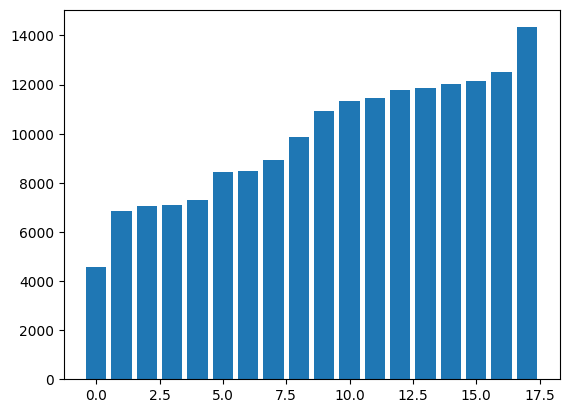

In [ ]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(len(distances[0]))], distances[0])

# Considerations for dense retrieval

## Requirements
1. what if answer is not in the text?
3. both semantic and keyword search if user thinks is a keyword search

## Chuncking
4. what if answer is in multiple sentences?

Different chunking strategies
- sentence/paragraph
- character split (every x characters)
- token split (every x tokens)
- token split with overlapping tokens
- LLM to dynamically split text into meaningful chunks

## Labels
2. track user clik on answer can be use to improve future versions (how)
5. thinking about labels -> we need to know if the user found the answer or not, if I am asking Gemini for instance is unclear whether the answer was helpful or not. Thumbs up and down are a good start.

## Indexing
- indexes like FAISS where they can tradeoff precision for speed, for instance clustering the indexes. But the indexes have to be trained.
- using vector DB allows you to add a new vector without having to rebuild the index

## Fine Tuning
- fine tune embedding for retrieval
- have retrieval queries and fine tune the LLM to optimze for embedding retrieval


# Example of retrieval datasets

> https://www.kaggle.com/competitions/vmware-zero-shot-information-retrieval?utm_source=chatgpt.com

> https://github.com/project-miracl/miracl

example of informationl retrieval kaggle competition

In [ ]:
2+2

4

# ReRanking

- first stage, keyword/lexical search like BM25
- second reranking, **cross-encoder architecture** via query-document pairs are assigned a score. This is a classification problem.

1. https://arxiv.org/abs/1910.14424 Multi-Stage Document Ranking with BERT
2. https://github.com/UKPLab/sentence-transformers/tree/master/examples/applications/retrieve_rerank

# ReRanking Evaluation

- **Mean Average Precision**: average P@K for all the relevant document in the final rank, averaged across different query. Balance between precision and recall
- **nDCG** (non discounted cumulative gain) is for non binary classification. Gain is the relevance of document at position k, where is not just binary but there is a relevance score. We discount it by its position (/k) and we normalize it.

1. https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-ranked-retrieval-results-1.html

# RAG

1. https://proceedings.neurips.cc/paper/2020/file/6b493230205f780e1bc26945df7481e5-Paper.pdf Retrieval-Augmented Generation for
Knowledge-Intensive NLP Tasks
2. Embedding Model is trained on contrastive loss, LLM is trained on cross-entropy next work prediction
3. Advanced RAG techniques

- **Query Rewriting**: use the LLM to rewrite the query into one that aids the retrieval step. User Question -> LLM question -> RAG
- **MultiQuery RAG**: have several RAG questions
- **Query Routing**: different retrieval system
- **Agentic RAGs**: query sources become APIs

# RAG Evaluation

- https://arxiv.org/pdf/2304.09848 Evaluating Verifiability in Generative Search Engines: not all generated statements are
fully supported by citations (**citation recall**), and not
every citation supports its associated statement (**citation
precision**).
- **LLM-as-a-judge**:  https://docs.ragas.io/en/stable/concepts/metrics/available_metrics/ capable LLM acting as a judge to score the generation on different axis like faithfulness (answer consistent to provided context) and relevance

# RAG with API

In [69]:
import numpy as np
import faiss

text = """
Interstellar is a 2014 epic science fiction drama film directed by Christopher Nolan, who co-wrote the screenplay with his brother Jonathan. It stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, and Michael Caine. Set in a dystopian future where Earth is suffering from catastrophic blight and famine, the film follows a group of astronauts who travel through a wormhole near Saturn in search of a new home for mankind.
The screenplay had its origins in a script Jonathan developed in 2007 and was originally set to be directed by Steven Spielberg. Theoretical physicist Kip Thorne was an executive producer and scientific consultant on the film, and wrote the tie-in book The Science of Interstellar. It was Lynda Obst's final film as producer before her death. Cinematographer Hoyte van Hoytema shot it on 35 mm movie film in the Panavision anamorphic format and IMAX 70 mm. Filming began in late 2013 and took place in Alberta, Klaustur, and Los Angeles. Interstellar uses extensive practical and miniature effects, and the company DNEG created additional digital effects.
Interstellar was released in theaters on November 7, 2014. In the United States, it was first released on film stock, expanding to venues using digital projectors. The film received generally positive reviews and grossed $681 million worldwide during its initial theatrical run, making it the tenth-highest-grossing film of 2014. Among its various accolades, Interstellar was nominated for five awards at the 87th Academy Awards, winning Best Visual Effects
The astrobiologist David Grinspoon criticized the dire "blight" situation on Earth portrayed in the early scenes, pointing out that even with a voracious blight it would have taken millions of years to reduce the atmosphere's oxygen content. He also notes that gravity should have pulled down the ice clouds.[57] Neil deGrasse Tyson, an astrophysicist, explored the science behind the ending of Interstellar, concluding that it is theoretically possible to interact with the past, and that "we don't really know what's in a black hole, so take it and run with it".[58] The theoretical physicist Michio Kaku praised the film for its scientific accuracy and said Interstellar "could set the gold standard for science fiction movies for years to come". Timothy Reyes, a former NASA software engineer, said "Thorne's and Nolan's accounting of black holes and wormholes and the use of gravity is excellent".[59]
"""

sentences = list(map(lambda x: x.strip("\n"), text.split('.')))
response = co.embed(texts=sentences, input_type="search_document")
embeds = np.array(response.embeddings)
dim = embeds.shape[1]
index = faiss.IndexFlatL2(dim)
index.add(np.float32(embeds))

In [ ]:
query = "income generated"

query_embed = co.embed(texts=[query], input_type="search_query").embeddings[0]

distances, sentences_ixs = index.search(np.float32([query_embed]), 3)

for i, ix in enumerate(sentences_ixs[0]):
  print(distances[0][i], sentences[int(ix)])

14002.053  Among its various accolades, Interstellar was nominated for five awards at the 87th Academy Awards, winning Best Visual Effects
The astrobiologist David Grinspoon criticized the dire "blight" situation on Earth portrayed in the early scenes, pointing out that even with a voracious blight it would have taken millions of years to reduce the atmosphere's oxygen content
14299.725  The film received generally positive reviews and grossed $681 million worldwide during its initial theatrical run, making it the tenth-highest-grossing film of 2014
15036.006  Timothy Reyes, a former NASA software engineer, said "Thorne's and Nolan's accounting of black holes and wormholes and the use of gravity is excellent"


In [ ]:
docs_dict = [{'text': sentences[ix]} for ix in sentences_ixs[0]]

In [ ]:
docs_dict

[{'text': ' Among its various accolades, Interstellar was nominated for five awards at the 87th Academy Awards, winning Best Visual Effects\nThe astrobiologist David Grinspoon criticized the dire "blight" situation on Earth portrayed in the early scenes, pointing out that even with a voracious blight it would have taken millions of years to reduce the atmosphere\'s oxygen content'},
 {'text': ' The film received generally positive reviews and grossed $681 million worldwide during its initial theatrical run, making it the tenth-highest-grossing film of 2014'},
 {'text': ' Timothy Reyes, a former NASA software engineer, said "Thorne\'s and Nolan\'s accounting of black holes and wormholes and the use of gravity is excellent"'}]

In [ ]:
response = co.chat(message="query", documents=docs_dict)

In [ ]:
response.text

'Interstellar is a film that received generally positive reviews and grossed $681 million worldwide during its initial theatrical run, making it the tenth-highest-grossing film of 2014. It was nominated for five awards at the 87th Academy Awards, winning Best Visual Effects.'

In [ ]:
reponse.pi

NonStreamedChatResponse(text='Interstellar is a film that received generally positive reviews and grossed $681 million worldwide during its initial theatrical run, making it the tenth-highest-grossing film of 2014. It was nominated for five awards at the 87th Academy Awards, winning Best Visual Effects.', generation_id='5cf0cec5-425a-4e27-940a-be951a5b8430', response_id='d1f6cdc7-c9d9-44bd-9c38-40bcc585ebc7', citations=[ChatCitation(start=0, end=12, text='Interstellar', document_ids=['doc_0', 'doc_1', 'doc_2'], type='TEXT_CONTENT'), ChatCitation(start=37, end=63, text='generally positive reviews', document_ids=['doc_1'], type='TEXT_CONTENT'), ChatCitation(start=68, end=132, text='grossed $681 million worldwide during its initial theatrical run', document_ids=['doc_1'], type='TEXT_CONTENT'), ChatCitation(start=148, end=184, text='tenth-highest-grossing film of 2014.', document_ids=['doc_1'], type='TEXT_CONTENT'), ChatCitation(start=192, end=244, text='nominated for five awards at the 87

In [ ]:
def insert_citations(text, citations):
    # Sort citations by their start index in descending order
    citations = sorted(citations, key=lambda x: x.start, reverse=True)
    for idx, citation in enumerate(citations):
        # Insert citation marker at the end position
        text = text[:citation.end] + f'[{idx + 1}]' + text[citation.end:]
    return text

# Assuming 'response' is your Chat API response object
formatted_text = insert_citations(response.text, response.citations)
print(formatted_text)

for idx, citation in enumerate(response.citations):
    doc_id = citation.document_ids[0]  # Assuming one document per citation
    # Find the document with the matching ID
    doc = next((doc for doc in response.documents if doc['id'] == doc_id), None)
    if doc:
        print(f"[{idx + 1}] {doc['text']}\n")


Interstellar[6] is a film that received generally positive reviews[5] and grossed $681 million worldwide during its initial theatrical run[4], making it the tenth-highest-grossing film of 2014.[3] It was nominated for five awards at the 87th Academy Awards[2], winning Best Visual Effects.[1]
[1]  Among its various accolades, Interstellar was nominated for five awards at the 87th Academy Awards, winning Best Visual Effects
The astrobiologist David Grinspoon criticized the dire "blight" situation on Earth portrayed in the early scenes, pointing out that even with a voracious blight it would have taken millions of years to reduce the atmosphere's oxygen content

[2]  The film received generally positive reviews and grossed $681 million worldwide during its initial theatrical run, making it the tenth-highest-grossing film of 2014

[3]  The film received generally positive reviews and grossed $681 million worldwide during its initial theatrical run, making it the tenth-highest-grossing film

In [ ]:
!wget https://huggingface.co/microsoft/Phi-3-mini-4k-instruct-gguf/resolve/main/Phi-3-mini-4k-instruct-q4.gguf

--2025-02-10 00:02:55--  https://huggingface.co/microsoft/Phi-3-mini-4k-instruct-gguf/resolve/main/Phi-3-mini-4k-instruct-q4.gguf
Resolving huggingface.co (huggingface.co)... 13.35.202.121, 13.35.202.40, 13.35.202.97, ...
Connecting to huggingface.co (huggingface.co)|13.35.202.121|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/41/c8/41c860f65b01de5dc4c68b00d84cead799d3e7c48e38ee749f4c6057776e2e9e/8a83c7fb9049a9b2e92266fa7ad04933bb53aa1e85136b7b30f1b8000ff2edef?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27Phi-3-mini-4k-instruct-q4.gguf%3B+filename%3D%22Phi-3-mini-4k-instruct-q4.gguf%22%3B&Expires=1739149375&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczOTE0OTM3NX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zLzQxL2M4LzQxYzg2MGY2NWIwMWRlNWRjNGM2OGIwMGQ4NGNlYWQ3OTlkM2U3YzQ4ZTM4ZWU3NDlmNGM2MDU3Nzc2ZTJlOWUvOGE4M2M3ZmI5MDQ5YTliMmU5MjI2NmZhN2FkMDQ5MzNiY

In [ ]:
# https://huggingface.co/spaces/mteb/arena

In [ ]:
!pip install langchain==0.2.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.6/974.6 kB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.1/397.1 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.8/311.8 kB 35.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.5
    Uninstalling langsmith-0.3.5:
      Successfully uninstalled langsmith-0.3.5
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.33
    Uninstalling langchain-core-0.3.33:
      Successfully uninstalled langchain-core-0.3.33
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.5
    Uninstalling langchain-text-splitters-0.3.5:
      Successfully uninstalled langchain-text-splitters-0.3.5
  Attempting uninstall

In [ ]:
from langchain import LlamaCpp

In [ ]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.0/413.0 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.2.43
    Uninstalling langchain-core-0.2.43:
      Successfully uninstalled langchain-core-0.2.43
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.2.4
    Uninstalling langchain-text-splitters-0.2.4:
      Successfully uninstalled langchain-text-splitters-0.2.4
  Attempting uninstall: langchain
    Found existing installation: langchain 0.2.5
    Uninstalling langchain-0.2.5:
      Successfully uninstalled langchain-0.2.5


In [49]:
llm  = LlamaCpp(model_path="./Phi-3-mini-4k-instruct-q4.gguf", n_gpu_layers=-1, max_tokens=500, n_ctx=2048, verbose=True, seed=42)

llama_model_loader: loaded meta data with 24 key-value pairs and 195 tensors from ./Phi-3-mini-4k-instruct-q4.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = phi3
llama_model_loader: - kv   1:                               general.name str              = Phi3
llama_model_loader: - kv   2:                        phi3.context_length u32              = 4096
llama_model_loader: - kv   3:                      phi3.embedding_length u32              = 3072
llama_model_loader: - kv   4:                   phi3.feed_forward_length u32              = 8192
llama_model_loader: - kv   5:                           phi3.block_count u32              = 32
llama_model_loader: - kv   6:                  phi3.attention.head_count u32              = 32
llama_model_loader: - kv   7:               phi3.attention.head_count_kv u32         

In [47]:
!CMAKE_ARGS="-DLLAMA_CUDA=on" pip install llama-cpp-python==0.2.78

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 MB 14.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.2 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.2.78-cp311-cp311-linux_x86_64.whl size=172379244 sha256=19bc09f2d433170487066521efd8103380992c2c8b5d9c40041ecd7cd4c03ea2
  Stored in directory: /root/.cache/pip/wheels/90/04/d0/e152de3e3f4ecf76f4a0c379e2806cc8a9700c0384b82cbd2f
Successfully built llama-cpp-python


In [48]:
2+2

4

In [53]:
llm.generate(["sum from n=1 to infinity of 1/(n(n+1)) = ?"])

Llama.generate: prefix-match hit

llama_print_timings:        load time =     426.30 ms
llama_print_timings:      sample time =     272.26 ms /   500 runs   (    0.54 ms per token,  1836.51 tokens per second)
llama_print_timings: prompt eval time =     180.95 ms /    19 tokens (    9.52 ms per token,   105.00 tokens per second)
llama_print_timings:        eval time =    8969.45 ms /   499 runs   (   17.97 ms per token,    55.63 tokens per second)
llama_print_timings:       total time =    9848.29 ms /   518 tokens


LLMResult(generations=[[Generation(text="\nA. 1\nB. -1\nC. 0\nD. none of these\nResponse: The given series is a telescoping series, which means that most terms will cancel out when the series is expanded. To see this, we can write each term as a difference of two fractions:\n\n\\[ \\frac{1}{n(n+1)} = \\frac{A}{n} + \\frac{B}{n+1} \\]\n\nTo find A and B, we solve the equation:\n\n\\[ A(n+1) + Bn = 1 \\]\n\nLet's set \\( n = 0 \\) to find B (and ignore that it doesn't work for \\( n = -1 \\)):\n\n\\[ A(0+1) + B(0) = 1 \\]\n\\[ A = 1 \\]\n\nNow let's set \\( n = -1 \\) to find A:\n\n\\[ A(-1+1) + B(-1) = 1 \\]\n\\[ -B = 1 \\]\n\\[ B = -1 \\]\n\nSo the original term can be written as:\n\n\\[ \\frac{1}{n(n+1)} = \\frac{1}{n} - \\frac{1}{n+1} \\]\n\nNow, let's write out the first few terms of the series to see the telescoping effect:\n\n\\[ (1-\\frac{1}{2}) + (\\frac{1}{2}-\\frac{1}{3}) + (\\frac{1}{3}-\\frac{1}{4}) + \\ldots \\]\n\nAs we expand this, we notice that most terms cancel out:\n\

In [54]:
from langchain.embeddings.huggingface import HuggingFaceEmbeddings

embedding_model = HuggingFaceEmbeddings(model_name="thenlper/gte-small")

<ipython-input-54-1ed24b78ca8d>:3: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  embedding_model = HuggingFaceEmbeddings(model_name="thenlper/gte-small")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [56]:
embed = embedding_model.embed_query("income generated by movie Interstellar")

In [58]:
len(embed)

384

In [60]:
import faiss

In [63]:
from langchain.vectorstores import FAISS

In [71]:
db = FAISS.from_texts(sentences, embedding_model)

In [75]:
template = """<|user|>
Relevant Information:
{context}

Provide a concise answer to the following question using the relevant information prived above:
{question}<|end|>
<|assistant|>"""

In [76]:
from langchain import PromptTemplate

In [77]:
prompt = PromptTemplate(template=template, input_variables=["context", "question"])

In [79]:
from langchain.chains import RetrievalQA

rag = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt}
)

In [80]:
rag.invoke("income generated")

Llama.generate: prefix-match hit

llama_print_timings:        load time =     426.30 ms
llama_print_timings:      sample time =      14.48 ms /    23 runs   (    0.63 ms per token,  1587.85 tokens per second)
llama_print_timings: prompt eval time =     941.11 ms /   144 tokens (    6.54 ms per token,   153.01 tokens per second)
llama_print_timings:        eval time =     409.99 ms /    23 runs   (   17.83 ms per token,    56.10 tokens per second)
llama_print_timings:       total time =    1380.16 ms /   167 tokens


{'query': 'income generated',
 'result': ' The interstellar film grossed $681 million worldwide during its initial theatrical run.',
 'source_documents': [Document(id='694ef1de-eb61-40a3-99ac-c65aae177828', metadata={}, page_content=' Cinematographer Hoyte van Hoytema shot it on 35 mm movie film in the Panavision anamorphic format and IMAX 70 mm'),
  Document(id='822d5cf2-542b-49fe-b8c1-27ccf759575a', metadata={}, page_content='[59]'),
  Document(id='3232ef62-c4f4-49c6-8c7d-e630cd862029', metadata={}, page_content=' The film received generally positive reviews and grossed $681 million worldwide during its initial theatrical run, making it the tenth-highest-grossing film of 2014'),
  Document(id='d8a5d6f6-d7e9-4137-a661-d9fcd785c77e', metadata={}, page_content=' Interstellar uses extensive practical and miniature effects, and the company DNEG created additional digital effects')]}